## Observations and Insights 

#Observation 1
- When we generated the scatter plots to correlate the data for Average Tumor Volume vs. Mouse weight, I notced that there was a strong correlation between the two data points. It

#Observation 2



#Observation 3
- Gender did not seem to play much (if any) role in the efficacy rates of the drugs.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice
mouse_count = len(combined_data['Mouse ID'].unique())
mouse_count

249

In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
dup_timepoint = combined_data.loc[combined_data.duplicated(subset = \
                             ['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_timepoint

array(['g989'], dtype=object)

In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
dup_timepoint_data = combined_data.set_index("Mouse ID")
dup_timepoint_df = dup_timepoint_data.loc["g989"]
dup_timepoint_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
cleaned_data_df = combined_data[combined_data['Mouse ID'].isin(dup_timepoint) == False]
cleaned_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(cleaned_data_df['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
drug_mean = cleaned_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].round(3)
drug_median = cleaned_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].round(3)
drug_variance = cleaned_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].round(3)
drug_std = cleaned_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].round(3)
drug_sem = cleaned_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].round(3)

# Use groupby and summary statistical methods to calculate the following properties of each drug 
# regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats_df = pd.DataFrame({"Mean": drug_mean,
                         "Median": drug_median,
                         "Variance": drug_variance,
                         "Std Dev": drug_std,
                         "SEM": drug_sem})
stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of 
# the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stat_df2 = cleaned_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": \
                                            ['mean', 'median', 'var', 'std', 'sem']}).round(3)
stat_df2

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

## Bar and Pie Charts

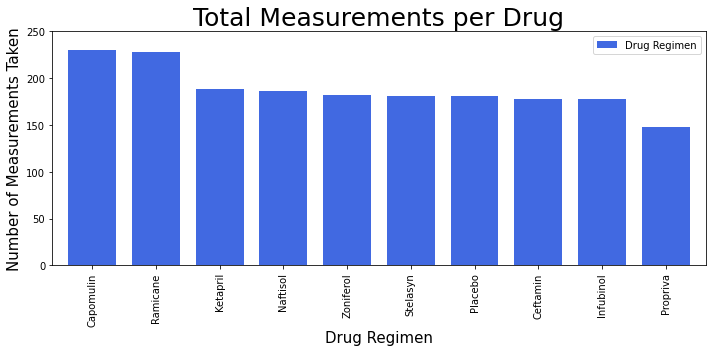

In [12]:
# Generate a bar plot showing the total # of measurements taken on each drug regimen using pandas.
regimen_data = cleaned_data_df["Drug Regimen"].value_counts()
# regimen_data
regimen_bar_chart = regimen_data.plot.bar(figsize=(10,5), color="royalblue", width=0.75)
regimen_bar_chart.set_title("Total Measurements per Drug", fontsize=25)
regimen_bar_chart.set_xlabel("Drug Regimen", fontsize=15)
regimen_bar_chart.set_ylabel("Number of Measurements Taken", fontsize=15)
plt.ylim(0,250)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

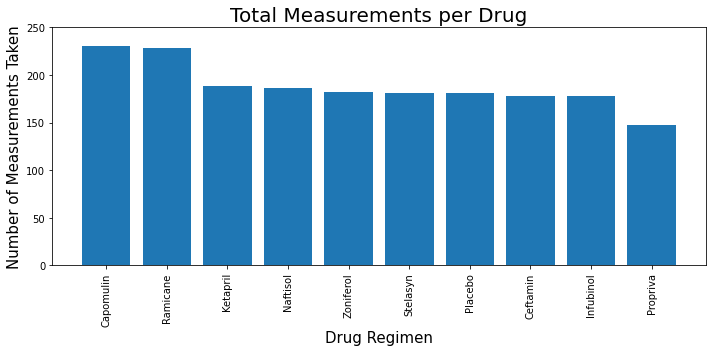

In [13]:
# Generate a bar plot showing the total # of measurements taken on each drug regimen using pyplot.
regimen_data = cleaned_data_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_data))
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(regimen_data.index.values,regimen_data.values)
tick_locations = [value for value in x_axis]
xtick_label = cleaned_data_df["Drug Regimen"].unique()
plt.xticks(rotation="vertical")
plt.title("Total Measurements per Drug", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=15)
plt.ylabel("Number of Measurements Taken", fontsize=15)
plt.ylim(0,250)
plt.tight_layout()

plt.show()

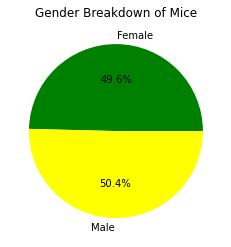

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = cleaned_data_df.groupby(["Sex"])
gender_info = gender_data["Mouse ID"].nunique()
gender_info.name = ""
colors=["green", "yellow"]
gender_info.plot(kind="pie", title=("Gender Breakdown of Mice"), autopct="%1.1f%%", colors=colors)

plt.show()

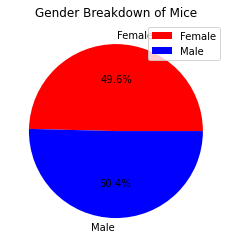

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = cleaned_data_df.groupby(["Sex"])
gender_info = gender_data["Mouse ID"].nunique()
colors=["red", "blue"]
plt.pie(gender_info, autopct="%1.1f%%", labels=["Female", "Male"], colors=colors)
plt.title("Gender Breakdown of Mice")
plt.legend(loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_drug_vol = cleaned_data_df.loc[(cleaned_data_df["Drug Regimen"] == "Capomulin") |
                  (cleaned_data_df["Drug Regimen"] == "Ramicane") |
                  (cleaned_data_df["Drug Regimen"] == "Infubinol") |
                  (cleaned_data_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = final_drug_vol.groupby("Mouse ID").max()[["Timepoint", "Drug Regimen"]]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_merged = pd.merge(cleaned_data_df, max_timepoint_df, \
                                how="right", on=["Mouse ID", "Timepoint", "Drug Regimen"])

max_timepoint_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [17]:
# Put treatments into a list for a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_reg = max_timepoint_merged[max_timepoint_merged["Drug Regimen"] == drug]
    
    # calculate the quartiles, IQR, & bounds
    quartiles = drug_reg["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq - lowerq, 3)
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    
    # append to the total volume list for each drug
    tumor_vol_list.append(drug_reg["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    outlier_vol = (drug_reg.loc[(drug_reg["Tumor Volume (mm3)"] < 
            lower_bound) | (drug_reg["Tumor Volume (mm3)"] > 
                upper_bound)])["Tumor Volume (mm3)"].count()

    # print out the data
    print(drug)
    print(f"IQR = {iqr}")
    print(f"Potential outliers will be below {lower_bound} or above {upper_bound}")
    print(f"{drug} currently has {outlier_vol} outlier(s)")
    print("-------------------------------------------------")

Capomulin
IQR = 7.782
Potential outliers will be below 20.704 or above 51.832
Capomulin currently has 0 outlier(s)
-------------------------------------------------
Ramicane
IQR = 9.099
Potential outliers will be below 17.912 or above 54.308
Ramicane currently has 0 outlier(s)
-------------------------------------------------
Infubinol
IQR = 11.477
Potential outliers will be below 36.833 or above 82.741
Infubinol currently has 1 outlier(s)
-------------------------------------------------
Ceftamin
IQR = 15.578
Potential outliers will be below 25.355 or above 87.667
Ceftamin currently has 0 outlier(s)
-------------------------------------------------


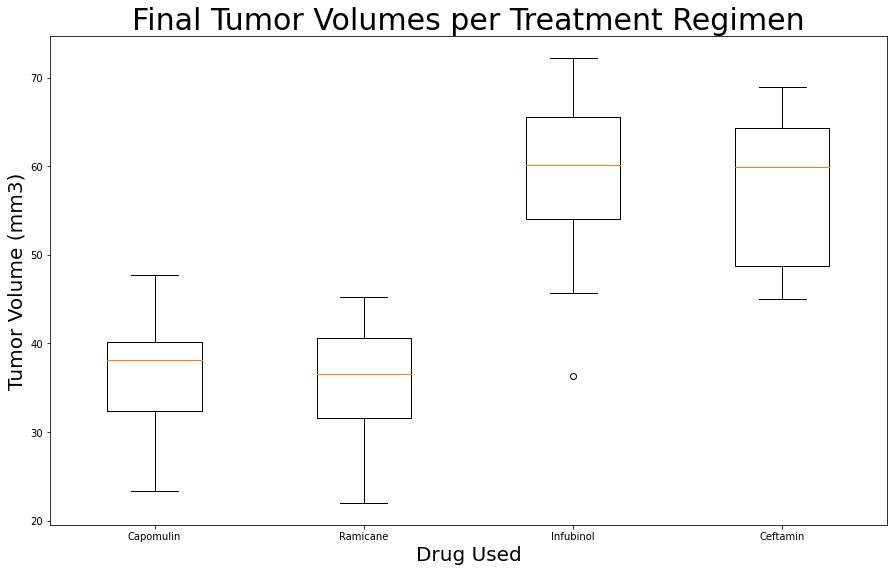

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 9))
plt.boxplot(tumor_vol_list, labels=treatment_list)
plt.title("Final Tumor Volumes per Treatment Regimen", fontsize=30)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)
plt.xlabel("Drug Used", fontsize=20)

plt.show()

## Line and Scatter Plots

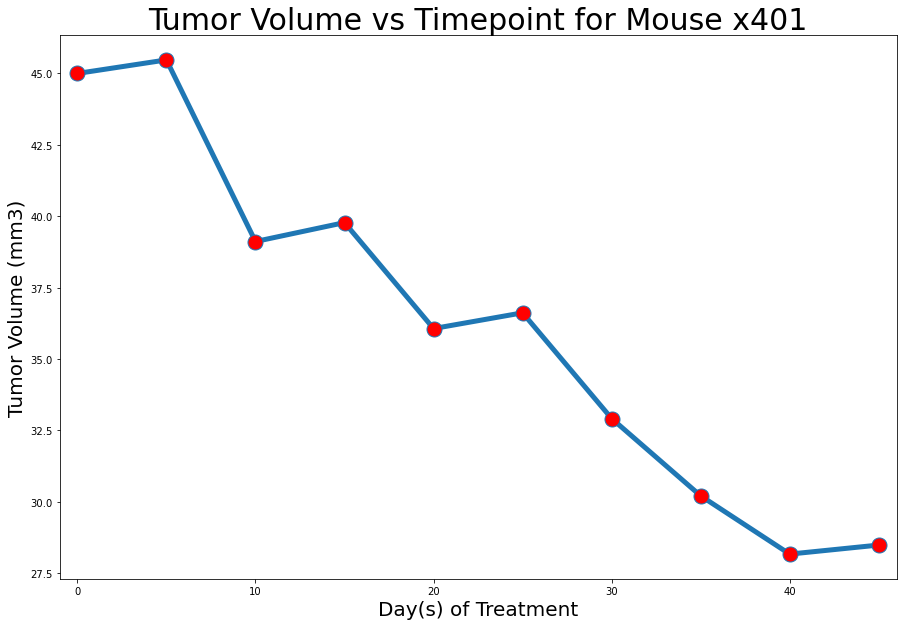

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_mouse = cleaned_data_df.loc[cleaned_data_df["Mouse ID"] == "x401"]

# plot chart and add markers, labels, etc.
fig1, ax1 = plt.subplots(figsize=(15, 10))
x_axis = line_plot_mouse["Timepoint"]
y_axis = line_plot_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, linewidth=5, marker="o", markersize=15, markerfacecolor="red")
plt.xlim(min(line_plot_mouse["Timepoint"])-1, max(line_plot_mouse["Timepoint"]+1))
plt.title("Tumor Volume vs Timepoint for Mouse x401", fontsize=30)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)
plt.xlabel("Day(s) of Treatment", fontsize=20)

plt.show()

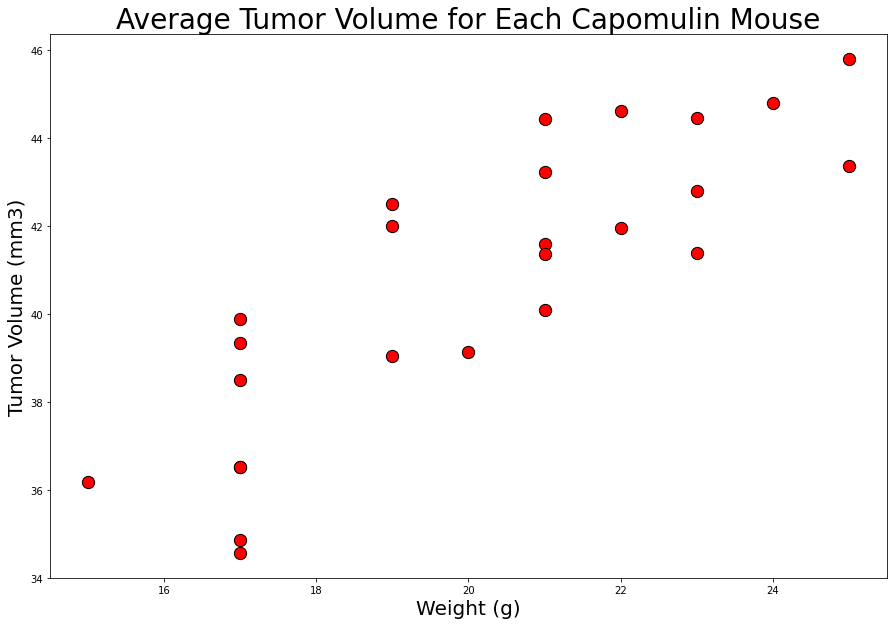

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# create new data base with only necessary data for scatter plot
scatter_df = cleaned_data_df[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]

# filter new data to only include rows that used capomulin
capomulin_df = scatter_df[scatter_df["Drug Regimen"] == "Capomulin"]

# find the average tumor volume for each mouse
avg_tumor_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# make new dataframe filtered to drop excess rown for each  mouse
capomulin_df2=capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates(subset='Mouse ID')

# merge the two dataframes together to make one dataframe with all and only necessary info
avg_weight_vol = pd.merge(avg_tumor_vol, capomulin_df2, on="Mouse ID")

# create the scatter plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(avg_weight_vol["Weight (g)"], avg_weight_vol["Tumor Volume (mm3)"],
            s=150, c="r", edgecolor="k")
plt.title("Average Tumor Volume for Each Capomulin Mouse", fontsize=28)
plt.xlabel("Weight (g)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)

plt.show()

## Correlation and Regression

The correlation between the mouses' weight and average tumor volume is 0.84


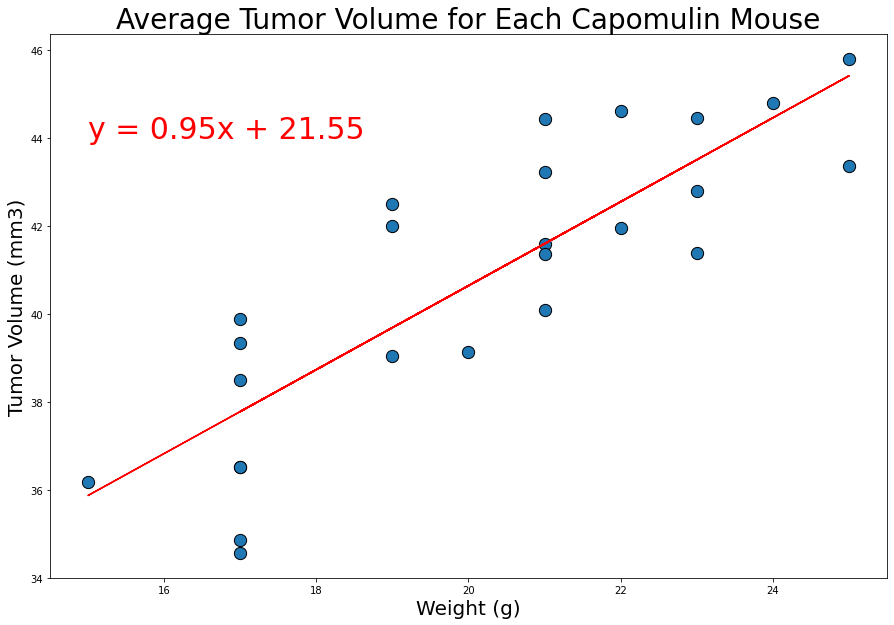

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_weight_vol["Weight (g)"],
                         avg_weight_vol["Tumor Volume (mm3)"])

print(f"The correlation between the mouses' weight and average tumor volume is {round(correlation[0],2)}")

# linear regression model
fig1, ax1 = plt.subplots(figsize=(15,10))
x_value = avg_weight_vol["Weight (g)"]
y_value = avg_weight_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=150, edgecolor="black")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (15,44), fontsize=30, color="red")
# add labels for easier reading
plt.title("Average Tumor Volume for Each Capomulin Mouse", fontsize=28)
plt.xlabel("Weight (g)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)

plt.show()